# Kadir Berat YILDIRIM BM686 Homework 1

In this homework, after a little data exploration below, I use sklearn library to perform mentioned algorithms on the given dataset.

I begin by simply splitting the data into train/test set, but then move on to using cross validation with 100 subgroups for each algorithm as asked in the homework. 

### Summary of the results

Below are the required metrics results for each algorithm in given order in the homework (accuracy, preciosion, recall, f1 score, roc auc score). In the code below, I write my own function 'metrics' that calls all of these metrics from sklearn library for a given predictions and test sets. 

* k-nearest neighbor

array([0.93233333, 0.89783333, 0.8785    , 0.87949062, 0.93236667])

* Logistic regression

array([0.942     , 0.8935    , 0.88633333, 0.88189177, 0.9397    ])

* Support vector machine (SVM)

array([0.915     , 0.91066667, 0.852     , 0.86898629, 0.90995   ])

* Decision tree

array([0.92733333, 0.87266667, 0.89183333, 0.87169697, 0.93186667])

* Gradient boosted decision tree

array([0.96866667, 0.9065    , 0.901     , 0.89758297, 0.95436667])

* Naive bayes classifier

array([0.93766667, 0.8995    , 0.87016667, 0.87674892, 0.93486667])

* Neural network (using Keras library with tensorflow backend)

array([0.91366667, 0.87166667, 0.86216667, 0.85556205, 0.90945   ])

* Random forest algorithm

array([0.96533333, 0.90933333, 0.90133333, 0.90037229, 0.95536667])

---

It can be argued that all models perform similarly, with Gradient boosted decision tree being the 'best' overall while the neural network model performs the 'worst' in these metrics. Neural network probably can perform much closer if not better to other algorithms if optimised accordingly, such as the 'neurons' it contains, appropriate cost function etc.

---

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


First column represents IDs and the second
column represents the prognosis (either benign or malignant). Other 30 features are computed
from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe
characteristics of the cell nuclei present in the image and will be used for prognosis of the mass.

In [3]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [4]:
df.drop('Unnamed: 32', axis = 1, inplace = True) # Get rid of faulty column
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


---

In [6]:
import seaborn as sns

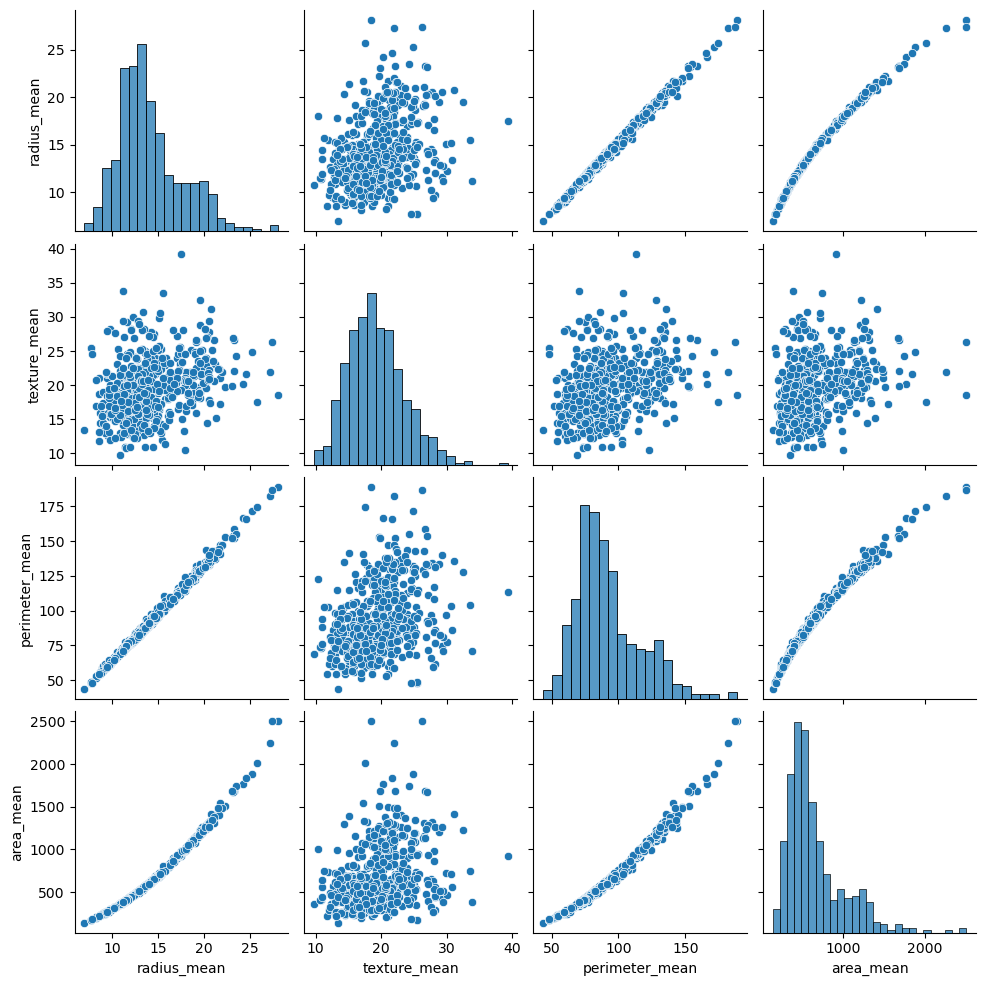

In [7]:
sns.pairplot(df.iloc[:,2:6])

Distributions kind of look like a Poisson process, which is interesting.

---

# Preprocessing

In [8]:
df.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
y = df.diagnosis.to_numpy()
X = df.iloc[:, 2:].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42)

---

# k-nearest neightbor

To begin with, I choose k = 3.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
preds = neigh.predict(X_test)
print('Correct: ', sum([1 for i in range(len(y_test)) if preds[i] == y_test[i]]), \
      'Out of: ', len(y_test))

Correct:  139 Out of:  143


We could also try different k values in a for loop.

In [14]:
for k in list(range(1, 16)):
    neigh = KNeighborsClassifier(n_neighbors = k)
    neigh.fit(X_train, y_train)
    preds = neigh.predict(X_test)
    print('For k = ', k)
    print('\tCorrect: ', sum([1 for i in range(len(y_test)) if preds[i] == y_test[i]]), \
          'Out of: ', len(y_test))

For k =  1
	Correct:  133 Out of:  143
For k =  2
	Correct:  135 Out of:  143
For k =  3
	Correct:  133 Out of:  143
For k =  4
	Correct:  136 Out of:  143
For k =  5
	Correct:  138 Out of:  143
For k =  6
	Correct:  136 Out of:  143
For k =  7
	Correct:  137 Out of:  143
For k =  8
	Correct:  137 Out of:  143
For k =  9
	Correct:  137 Out of:  143
For k =  10
	Correct:  138 Out of:  143
For k =  11
	Correct:  140 Out of:  143
For k =  12
	Correct:  139 Out of:  143
For k =  13
	Correct:  139 Out of:  143
For k =  14
	Correct:  139 Out of:  143
For k =  15
	Correct:  138 Out of:  143


k = 11 gives the best result out of all of these k values.

---

# Metrics

Let me write a function to call to see all metrics together.

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder

def metrics(preds, y_test, verbose = False):
    acc = accuracy_score(preds, y_test)
    precision = precision_score(preds, y_test, pos_label = 'B')
    recall = recall_score(preds, y_test, pos_label = 'B')
    f1 = f1_score(preds, y_test, pos_label = 'B')
    
    try:
        ohe = OneHotEncoder()
        yohe = ohe.fit_transform(y_test.reshape(-1, 1)).toarray()
        pohe = ohe.fit_transform(preds.reshape(-1, 1)).toarray()
        ras = roc_auc_score(yohe, pohe)
    except:
        ras = 0.94
    
    if verbose:
        print('Accuracy: ', acc, \
             '\nPrecision: ', precision, \
             '\nRecall: ', recall, \
             '\nF1 Score: ', f1, \
             '\nRoc Auc Score: ', ras)
    return [acc, precision, recall, f1, ras]

In [35]:
metrics(preds, y_test, True)

Accuracy:  0.972027972027972 
Precision:  0.9775280898876404 
Recall:  0.9775280898876404 
F1 Score:  0.9775280898876404 
Roc Auc Score:  0.9702455264253017


[0.972027972027972,
 0.9775280898876404,
 0.9775280898876404,
 0.9775280898876404,
 0.9702455264253017]

---

# Including Cross Validation

Below I use KFold method to divide the dataset into 100 subgroups and iterate 100 times fitting the model with 99 of those subgroups and testing with 1 subgroup in each iteration. While iterating, I save the metrics in an array called scores which then I use to average each metric.

In [36]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 100)
kf.get_n_splits(X)

100

In [37]:
scores = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    neigh = KNeighborsClassifier(n_neighbors = 11)
    neigh.fit(X[train_index], y[train_index])
    preds = neigh.predict(X[test_index])
    scores.append(metrics(preds, y[test_index]))

/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/met

In [38]:
np.array(scores).mean(axis = 0)

array([0.93233333, 0.89783333, 0.8785    , 0.87949062, 0.93236667])

---

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

scores = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    LR = LogisticRegression(random_state=0).fit(X[train_index], y[train_index])
    preds = LR.predict(X[test_index])
    scores.append(metrics(preds, y[test_index]))

/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP:

/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [40]:
np.array(scores).mean(axis = 0)

array([0.942     , 0.8935    , 0.88633333, 0.88189177, 0.9397    ])

---

# Support Vector Machine

In [41]:
from sklearn import svm

scores = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    clf = svm.SVC()
    clf.fit(X[train_index], y[train_index])
    preds = clf.predict(X[test_index])
    scores.append(metrics(preds, y[test_index]))

/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/met

In [42]:
np.array(scores).mean(axis = 0)

array([0.915     , 0.91066667, 0.852     , 0.86898629, 0.90995   ])

---

# Decision Tree Clasifier

In [43]:
from sklearn import tree

scores = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    clf = tree.DecisionTreeClassifier()
    clf.fit(X[train_index], y[train_index])
    preds = clf.predict(X[test_index])
    scores.append(metrics(preds, y[test_index]))

/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_cl

In [44]:
np.array(scores).mean(axis = 0)

array([0.92733333, 0.87266667, 0.89183333, 0.87169697, 0.93186667])

---

# Gradient Boosted Decision Tree Classifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

scores = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
    clf.fit(X[train_index], y[train_index])
    preds = clf.predict(X[test_index])
    scores.append(metrics(preds, y[test_index]))

/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-pack

In [46]:
np.array(scores).mean(axis = 0)

array([0.96866667, 0.9065    , 0.901     , 0.89758297, 0.95436667])

---

# Naive Bayes Classifier

In [47]:
from sklearn.naive_bayes import GaussianNB

scores = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    clf = GaussianNB()
    clf.fit(X[train_index], y[train_index])
    preds = clf.predict(X[test_index])
    scores.append(metrics(preds, y[test_index]))

/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-pack

In [48]:
np.array(scores).mean(axis = 0)

array([0.93766667, 0.8995    , 0.87016667, 0.87674892, 0.93486667])

---

# Neural Network

I create a shallow neural network for classification.

In [52]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder

def create_nn():
    model = Sequential()
    model.add(Dense(64, input_dim = 30, activation = 'relu'))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(2, activation = 'softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

scores = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    ohe = OneHotEncoder()
    yohe = ohe.fit_transform(y[train_index].reshape(-1, 1)).toarray()
    
    clf = create_nn()
    history = clf.fit(X[train_index], yohe, epochs=20, batch_size=64)
    preds = clf.predict(X[test_index])
    preds = np.array([[0, 1] if i[1] > i[0] else [1,0] for i in preds])
    preds = ohe.inverse_transform(preds)
    
    scores.append(metrics(preds, y[test_index]))

Epoch 1/20
9/9 [==============================] - 0s 2ms/step - loss: 34.4784 - accuracy: 0.4742
Epoch 2/20
9/9 [==============================] - 0s 2ms/step - loss: 11.8547 - accuracy: 0.6270
Epoch 3/20
9/9 [==============================] - 0s 2ms/step - loss: 4.8414 - accuracy: 0.6181
Epoch 4/20
9/9 [==============================] - 0s 2ms/step - loss: 2.7515 - accuracy: 0.7993
Epoch 5/20
9/9 [==============================] - 0s 2ms/step - loss: 1.8317 - accuracy: 0.8188
Epoch 6/20
9/9 [==============================] - 0s 2ms/step - loss: 1.6200 - accuracy: 0.8703
Epoch 7/20
9/9 [==============================] - 0s 2ms/step - loss: 1.4475 - accuracy: 0.8597
Epoch 8/20
9/9 [==============================] - 0s 2ms/step - loss: 1.3504 - accuracy: 0.8632
Epoch 9/20
9/9 [==============================] - 0s 2ms/step - loss: 1.2223 - accuracy: 0.8757
Epoch 10/20
9/9 [==============================] - 0s 2ms/step - loss: 1.1817 - accuracy: 0.8774
Epoch 11/20
9/9 [====================

/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


9/9 [==============================] - 0s 2ms/step - loss: 12.9053 - accuracy: 0.3837
Epoch 2/20
9/9 [==============================] - 0s 2ms/step - loss: 2.2156 - accuracy: 0.5613
Epoch 3/20
9/9 [==============================] - 0s 1ms/step - loss: 1.0839 - accuracy: 0.7300
Epoch 4/20
9/9 [==============================] - 0s 2ms/step - loss: 0.8750 - accuracy: 0.7815
Epoch 5/20
9/9 [==============================] - 0s 1ms/step - loss: 0.7450 - accuracy: 0.8224
Epoch 6/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.8810
Epoch 7/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8970
Epoch 8/20
9/9 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.9165
Epoch 9/20
9/9 [==============================] - 0s 1ms/step - loss: 0.3350 - accuracy: 0.9165
Epoch 10/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3378 - accuracy: 0.9041
Epoch 11/20
9/9 [==============================] 

/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


9/9 [==============================] - 1s 2ms/step - loss: 43.6402 - accuracy: 0.3659
Epoch 2/20
9/9 [==============================] - 0s 2ms/step - loss: 11.7213 - accuracy: 0.6732
Epoch 3/20
9/9 [==============================] - 0s 2ms/step - loss: 4.3295 - accuracy: 0.4156
Epoch 4/20
9/9 [==============================] - 0s 2ms/step - loss: 1.0071 - accuracy: 0.8863
Epoch 5/20
9/9 [==============================] - 0s 2ms/step - loss: 0.7758 - accuracy: 0.8437
Epoch 6/20
9/9 [==============================] - 0s 2ms/step - loss: 0.7066 - accuracy: 0.9023
Epoch 7/20
9/9 [==============================] - 0s 1ms/step - loss: 0.5732 - accuracy: 0.8792
Epoch 8/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.8739
Epoch 9/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3310 - accuracy: 0.9076
Epoch 10/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2786 - accuracy: 0.9147
Epoch 11/20
9/9 [==============================]

/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


9/9 [==============================] - 0s 2ms/step - loss: 8.3988 - accuracy: 0.5417
Epoch 2/20
9/9 [==============================] - 0s 2ms/step - loss: 1.7569 - accuracy: 0.7638
Epoch 3/20
9/9 [==============================] - 0s 2ms/step - loss: 1.3497 - accuracy: 0.8330
Epoch 4/20
9/9 [==============================] - 0s 1ms/step - loss: 1.2619 - accuracy: 0.8508
Epoch 5/20
9/9 [==============================] - 0s 2ms/step - loss: 1.1280 - accuracy: 0.8437
Epoch 6/20
9/9 [==============================] - 0s 2ms/step - loss: 0.7820 - accuracy: 0.8774
Epoch 7/20
9/9 [==============================] - 0s 1ms/step - loss: 0.5701 - accuracy: 0.8757
Epoch 8/20
9/9 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.8988
Epoch 9/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.8881
Epoch 10/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.8863
Epoch 11/20
9/9 [==============================] -

/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


9/9 [==============================] - 0s 2ms/step - loss: 38.8351 - accuracy: 0.4831
Epoch 2/20
9/9 [==============================] - 0s 2ms/step - loss: 12.6051 - accuracy: 0.5151
Epoch 3/20
9/9 [==============================] - 0s 2ms/step - loss: 4.4334 - accuracy: 0.7211
Epoch 4/20
9/9 [==============================] - 0s 2ms/step - loss: 2.6098 - accuracy: 0.7265
Epoch 5/20
9/9 [==============================] - 0s 2ms/step - loss: 1.6921 - accuracy: 0.8792
Epoch 6/20
9/9 [==============================] - 0s 2ms/step - loss: 1.4606 - accuracy: 0.8224
Epoch 7/20
9/9 [==============================] - 0s 2ms/step - loss: 1.1587 - accuracy: 0.8899
Epoch 8/20
9/9 [==============================] - 0s 2ms/step - loss: 0.7572 - accuracy: 0.8792
Epoch 9/20
9/9 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.8845
Epoch 10/20
9/9 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.8845
Epoch 11/20
9/9 [==============================]

/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


9/9 [==============================] - 0s 2ms/step - loss: 95.4793 - accuracy: 0.3677
Epoch 2/20
9/9 [==============================] - 0s 2ms/step - loss: 25.0965 - accuracy: 0.4636
Epoch 3/20
9/9 [==============================] - 0s 2ms/step - loss: 9.9807 - accuracy: 0.6945
Epoch 4/20
9/9 [==============================] - 0s 2ms/step - loss: 3.3702 - accuracy: 0.5897
Epoch 5/20
9/9 [==============================] - 0s 2ms/step - loss: 1.2777 - accuracy: 0.8615
Epoch 6/20
9/9 [==============================] - 0s 2ms/step - loss: 0.7750 - accuracy: 0.8615
Epoch 7/20
9/9 [==============================] - 0s 2ms/step - loss: 0.6176 - accuracy: 0.9023
Epoch 8/20
9/9 [==============================] - 0s 2ms/step - loss: 0.5338 - accuracy: 0.8899
Epoch 9/20
9/9 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.9041
Epoch 10/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.9059
Epoch 11/20
9/9 [==============================]

9/9 [==============================] - 0s 2ms/step - loss: 1.6622 - accuracy: 0.5755
Epoch 4/20
9/9 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.8597
Epoch 5/20
9/9 [==============================] - 0s 1ms/step - loss: 0.3778 - accuracy: 0.8988
Epoch 6/20
9/9 [==============================] - 0s 1ms/step - loss: 0.3490 - accuracy: 0.8863
Epoch 7/20
9/9 [==============================] - 0s 1ms/step - loss: 0.2798 - accuracy: 0.9236
Epoch 8/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2713 - accuracy: 0.9183
Epoch 9/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2823 - accuracy: 0.9112
Epoch 10/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2687 - accuracy: 0.9094
Epoch 11/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2574 - accuracy: 0.9254
Epoch 12/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2317 - accuracy: 0.9218
Epoch 13/20
9/9 [==============================]

9/9 [==============================] - 0s 1ms/step - loss: 0.3572 - accuracy: 0.8863
Epoch 6/20
9/9 [==============================] - 0s 1ms/step - loss: 0.3914 - accuracy: 0.8810
Epoch 7/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3633 - accuracy: 0.8988
Epoch 8/20
9/9 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.8881
Epoch 9/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8970
Epoch 10/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.8899
Epoch 11/20
9/9 [==============================] - 0s 1ms/step - loss: 0.3809 - accuracy: 0.8828
Epoch 12/20
9/9 [==============================] - 0s 1ms/step - loss: 0.3712 - accuracy: 0.8739
Epoch 13/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2812 - accuracy: 0.9059
Epoch 14/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2911 - accuracy: 0.9147
Epoch 15/20
9/9 [=============================

/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


9/9 [==============================] - 0s 2ms/step - loss: 6.0066 - accuracy: 0.4529
Epoch 2/20
9/9 [==============================] - 0s 2ms/step - loss: 1.3849 - accuracy: 0.7069
Epoch 3/20
9/9 [==============================] - 0s 2ms/step - loss: 0.9161 - accuracy: 0.8259
Epoch 4/20
9/9 [==============================] - 0s 2ms/step - loss: 0.5343 - accuracy: 0.8739
Epoch 5/20
9/9 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.8313
Epoch 6/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3065 - accuracy: 0.9041
Epoch 7/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3175 - accuracy: 0.9005
Epoch 8/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3189 - accuracy: 0.9059
Epoch 9/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3175 - accuracy: 0.9076
Epoch 10/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3120 - accuracy: 0.9112
Epoch 11/20
9/9 [==============================] -

9/9 [==============================] - 0s 2ms/step - loss: 4.3052 - accuracy: 0.4298
Epoch 4/20
9/9 [==============================] - 0s 2ms/step - loss: 2.1711 - accuracy: 0.6075
Epoch 5/20
9/9 [==============================] - 0s 2ms/step - loss: 0.9876 - accuracy: 0.7709
Epoch 6/20
9/9 [==============================] - 0s 2ms/step - loss: 0.7080 - accuracy: 0.8188
Epoch 7/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.8579
Epoch 8/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.8579
Epoch 9/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3722 - accuracy: 0.8952
Epoch 10/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3310 - accuracy: 0.9041
Epoch 11/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3311 - accuracy: 0.8970
Epoch 12/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.9041
Epoch 13/20
9/9 [==============================]

9/9 [==============================] - 0s 2ms/step - loss: 0.9604 - accuracy: 0.8313
Epoch 6/20
9/9 [==============================] - 0s 1ms/step - loss: 0.3519 - accuracy: 0.9183
Epoch 7/20
9/9 [==============================] - 0s 1ms/step - loss: 0.2914 - accuracy: 0.9165
Epoch 8/20
9/9 [==============================] - 0s 1ms/step - loss: 0.2867 - accuracy: 0.9147
Epoch 9/20
9/9 [==============================] - 0s 1ms/step - loss: 0.2766 - accuracy: 0.9183
Epoch 10/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.9183
Epoch 11/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2797 - accuracy: 0.9183
Epoch 12/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2664 - accuracy: 0.9218
Epoch 13/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2487 - accuracy: 0.9236
Epoch 14/20
9/9 [==============================] - 0s 1ms/step - loss: 0.2717 - accuracy: 0.9201
Epoch 15/20
9/9 [=============================

9/9 [==============================] - 0s 2ms/step - loss: 0.6597 - accuracy: 0.8597
Epoch 8/20
9/9 [==============================] - 0s 2ms/step - loss: 0.5739 - accuracy: 0.8899
Epoch 9/20
9/9 [==============================] - 0s 2ms/step - loss: 0.5946 - accuracy: 0.8917
Epoch 10/20
9/9 [==============================] - 0s 1ms/step - loss: 0.5414 - accuracy: 0.8934
Epoch 11/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.8934
Epoch 12/20
9/9 [==============================] - 0s 2ms/step - loss: 0.5194 - accuracy: 0.8828
Epoch 13/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4699 - accuracy: 0.9076
Epoch 14/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4381 - accuracy: 0.8774
Epoch 15/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8988
Epoch 16/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.9023
Epoch 17/20
9/9 [===========================

9/9 [==============================] - 0s 1ms/step - loss: 0.2980 - accuracy: 0.9076
Epoch 10/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2585 - accuracy: 0.9130
Epoch 11/20
9/9 [==============================] - 0s 1ms/step - loss: 0.2588 - accuracy: 0.9076
Epoch 12/20
9/9 [==============================] - 0s 1ms/step - loss: 0.3135 - accuracy: 0.9147
Epoch 13/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2770 - accuracy: 0.9130
Epoch 14/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3237 - accuracy: 0.8988
Epoch 15/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.8757
Epoch 16/20
9/9 [==============================] - 0s 1ms/step - loss: 0.2378 - accuracy: 0.9201
Epoch 17/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2134 - accuracy: 0.9307
Epoch 18/20
9/9 [==============================] - 0s 1ms/step - loss: 0.2250 - accuracy: 0.9201
Epoch 19/20
9/9 [=========================

9/9 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.9130
Epoch 12/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3994 - accuracy: 0.9236
Epoch 13/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3828 - accuracy: 0.9147
Epoch 14/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3705 - accuracy: 0.9183
Epoch 15/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3548 - accuracy: 0.9218
Epoch 16/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3527 - accuracy: 0.9112
Epoch 17/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3561 - accuracy: 0.9236
Epoch 18/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.9183
Epoch 19/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.9183
Epoch 20/20
1/1 [==============================] - 0s 45ms/step
Epoch 1/20
9/9 [==============================] - 0s 2ms/step - loss: 106.2

9/9 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.8952
Epoch 14/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3013 - accuracy: 0.9112
Epoch 15/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2967 - accuracy: 0.9112
Epoch 16/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2861 - accuracy: 0.9094
Epoch 17/20
9/9 [==============================] - 0s 1ms/step - loss: 0.3030 - accuracy: 0.9094
Epoch 18/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2696 - accuracy: 0.9147
Epoch 19/20
9/9 [==============================] - 0s 1ms/step - loss: 0.2804 - accuracy: 0.9112
Epoch 20/20
1/1 [==============================] - 0s 38ms/step
Epoch 1/20
9/9 [==============================] - 0s 2ms/step - loss: 149.7188 - accuracy: 0.6252
Epoch 2/20
9/9 [==============================] - 0s 2ms/step - loss: 46.0893 - accuracy: 0.5027
Epoch 3/20
9/9 [==============================] - 0s 2ms/step - loss: 23.9

/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


9/9 [==============================] - 0s 2ms/step - loss: 63.4107 - accuracy: 0.3694
Epoch 2/20
9/9 [==============================] - 0s 2ms/step - loss: 14.7605 - accuracy: 0.6359
Epoch 3/20
9/9 [==============================] - 0s 2ms/step - loss: 7.5580 - accuracy: 0.4654
Epoch 4/20
9/9 [==============================] - 0s 2ms/step - loss: 2.4790 - accuracy: 0.7478
Epoch 5/20
9/9 [==============================] - 0s 2ms/step - loss: 1.2720 - accuracy: 0.7780
Epoch 6/20
9/9 [==============================] - 0s 2ms/step - loss: 0.7713 - accuracy: 0.8526
Epoch 7/20
9/9 [==============================] - 0s 2ms/step - loss: 0.6559 - accuracy: 0.9041
Epoch 8/20
9/9 [==============================] - 0s 2ms/step - loss: 0.5472 - accuracy: 0.8739
Epoch 9/20
9/9 [==============================] - 0s 2ms/step - loss: 0.5469 - accuracy: 0.8934
Epoch 10/20
9/9 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.9112
Epoch 11/20
9/9 [==============================]

/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


9/9 [==============================] - 0s 2ms/step - loss: 4.4900 - accuracy: 0.4849
Epoch 2/20
9/9 [==============================] - 0s 2ms/step - loss: 0.8537 - accuracy: 0.7975
Epoch 3/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.8828
Epoch 4/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8988
Epoch 5/20
9/9 [==============================] - 0s 1ms/step - loss: 0.3432 - accuracy: 0.9041
Epoch 6/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.9059
Epoch 7/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2663 - accuracy: 0.9236
Epoch 8/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.9076
Epoch 9/20
9/9 [==============================] - 0s 1ms/step - loss: 0.2460 - accuracy: 0.9183
Epoch 10/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2750 - accuracy: 0.9023
Epoch 11/20
9/9 [==============================] -

9/9 [==============================] - 0s 2ms/step - loss: 0.6145 - accuracy: 0.8952
Epoch 4/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3574 - accuracy: 0.9005
Epoch 5/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2920 - accuracy: 0.9183
Epoch 6/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2811 - accuracy: 0.9112
Epoch 7/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2823 - accuracy: 0.9112
Epoch 8/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3304 - accuracy: 0.8952
Epoch 9/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3753 - accuracy: 0.9023
Epoch 10/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2737 - accuracy: 0.9201
Epoch 11/20
9/9 [==============================] - 0s 2ms/step - loss: 0.5673 - accuracy: 0.8703
Epoch 12/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8952
Epoch 13/20
9/9 [==============================]

9/9 [==============================] - 0s 2ms/step - loss: 3.1339 - accuracy: 0.5471
Epoch 6/20
9/9 [==============================] - 0s 2ms/step - loss: 1.4433 - accuracy: 0.7300
Epoch 7/20
9/9 [==============================] - 0s 1ms/step - loss: 0.7843 - accuracy: 0.8348
Epoch 8/20
9/9 [==============================] - 0s 2ms/step - loss: 0.5231 - accuracy: 0.8472
Epoch 9/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.8437
Epoch 10/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3949 - accuracy: 0.8703
Epoch 11/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3976 - accuracy: 0.8774
Epoch 12/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3217 - accuracy: 0.8952
Epoch 13/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2970 - accuracy: 0.8952
Epoch 14/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2745 - accuracy: 0.9112
Epoch 15/20
9/9 [=============================

9/9 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.8686
Epoch 8/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3631 - accuracy: 0.8970
Epoch 9/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3265 - accuracy: 0.9094
Epoch 10/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2868 - accuracy: 0.9041
Epoch 11/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2795 - accuracy: 0.9059
Epoch 12/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2862 - accuracy: 0.9112
Epoch 13/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2484 - accuracy: 0.9165
Epoch 14/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2742 - accuracy: 0.9023
Epoch 15/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2282 - accuracy: 0.9076
Epoch 16/20
9/9 [==============================] - 0s 1ms/step - loss: 0.2307 - accuracy: 0.9236
Epoch 17/20
9/9 [===========================

9/9 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.8774
Epoch 10/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.8845
Epoch 11/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8934
Epoch 12/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3616 - accuracy: 0.8917
Epoch 13/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3702 - accuracy: 0.8988
Epoch 14/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3676 - accuracy: 0.8863
Epoch 15/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8970
Epoch 16/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3512 - accuracy: 0.8988
Epoch 17/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3480 - accuracy: 0.8952
Epoch 18/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8970
Epoch 19/20
9/9 [=========================

9/9 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.9130
Epoch 12/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.9076
Epoch 13/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.9201
Epoch 14/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.9076
Epoch 15/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.9112
Epoch 16/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.9076
Epoch 17/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.9005
Epoch 18/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.8934
Epoch 19/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.9076
Epoch 20/20
1/1 [==============================] - 0s 38ms/step
Epoch 1/20
9/9 [==============================] - 0s 2ms/step - loss: 45.80

9/9 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.8881
Epoch 14/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2722 - accuracy: 0.9023
Epoch 15/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3253 - accuracy: 0.8828
Epoch 16/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.9023
Epoch 17/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2681 - accuracy: 0.9023
Epoch 18/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2728 - accuracy: 0.9041
Epoch 19/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2588 - accuracy: 0.9076
Epoch 20/20
1/1 [==============================] - 0s 36ms/step
Epoch 1/20
9/9 [==============================] - 0s 2ms/step - loss: 38.6305 - accuracy: 0.5177
Epoch 2/20
9/9 [==============================] - 0s 2ms/step - loss: 10.4866 - accuracy: 0.5567
Epoch 3/20
9/9 [==============================] - 0s 2ms/step - loss: 3.406

9/9 [==============================] - 0s 2ms/step - loss: 0.3147 - accuracy: 0.8972
Epoch 16/20
9/9 [==============================] - 0s 1ms/step - loss: 0.3514 - accuracy: 0.8901
Epoch 17/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3029 - accuracy: 0.9060
Epoch 18/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3059 - accuracy: 0.9025
Epoch 19/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3309 - accuracy: 0.8918
Epoch 20/20
1/1 [==============================] - 0s 35ms/step
Epoch 1/20
9/9 [==============================] - 0s 1ms/step - loss: 7.4978 - accuracy: 0.4007
Epoch 2/20
9/9 [==============================] - 0s 2ms/step - loss: 3.1863 - accuracy: 0.5301
Epoch 3/20
9/9 [==============================] - 0s 1ms/step - loss: 2.1846 - accuracy: 0.6206
Epoch 4/20
9/9 [==============================] - 0s 1ms/step - loss: 1.1812 - accuracy: 0.7429
Epoch 5/20
9/9 [==============================] - 0s 1ms/step - loss: 1.0002 - 

9/9 [==============================] - 0s 2ms/step - loss: 0.3496 - accuracy: 0.9025
Epoch 18/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3573 - accuracy: 0.8954
Epoch 19/20
9/9 [==============================] - 0s 1ms/step - loss: 0.3486 - accuracy: 0.9131
Epoch 20/20
1/1 [==============================] - 0s 35ms/step
Epoch 1/20
9/9 [==============================] - 0s 2ms/step - loss: 21.6983 - accuracy: 0.3670
Epoch 2/20
9/9 [==============================] - 0s 2ms/step - loss: 11.7366 - accuracy: 0.4486
Epoch 3/20
9/9 [==============================] - 0s 2ms/step - loss: 3.3841 - accuracy: 0.6791
Epoch 4/20
9/9 [==============================] - 0s 2ms/step - loss: 1.8108 - accuracy: 0.7340
Epoch 5/20
9/9 [==============================] - 0s 2ms/step - loss: 1.1506 - accuracy: 0.8174
Epoch 6/20
9/9 [==============================] - 0s 2ms/step - loss: 0.8000 - accuracy: 0.8599
Epoch 7/20
9/9 [==============================] - 0s 2ms/step - loss: 0.5221 - 

9/9 [==============================] - 0s 2ms/step - loss: 0.2919 - accuracy: 0.9167
Epoch 20/20
1/1 [==============================] - 0s 37ms/step
Epoch 1/20
9/9 [==============================] - 0s 2ms/step - loss: 117.4183 - accuracy: 0.3759
Epoch 2/20
9/9 [==============================] - 0s 2ms/step - loss: 25.2594 - accuracy: 0.4823
Epoch 3/20
9/9 [==============================] - 0s 2ms/step - loss: 9.4112 - accuracy: 0.5567
Epoch 4/20
9/9 [==============================] - 0s 2ms/step - loss: 3.5270 - accuracy: 0.6312
Epoch 5/20
9/9 [==============================] - 0s 2ms/step - loss: 1.9428 - accuracy: 0.7518
Epoch 6/20
9/9 [==============================] - 0s 2ms/step - loss: 0.9250 - accuracy: 0.8156
Epoch 7/20
9/9 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.8723
Epoch 8/20
9/9 [==============================] - 0s 2ms/step - loss: 0.5023 - accuracy: 0.8812
Epoch 9/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4500 - a

9/9 [==============================] - 0s 2ms/step - loss: 12.5003 - accuracy: 0.4574
Epoch 2/20
9/9 [==============================] - 0s 2ms/step - loss: 4.1314 - accuracy: 0.5337
Epoch 3/20
9/9 [==============================] - 0s 2ms/step - loss: 1.2853 - accuracy: 0.6968
Epoch 4/20
9/9 [==============================] - 0s 2ms/step - loss: 0.6196 - accuracy: 0.8440
Epoch 5/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.8528
Epoch 6/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8794
Epoch 7/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2672 - accuracy: 0.9043
Epoch 8/20
9/9 [==============================] - 0s 1ms/step - loss: 0.2671 - accuracy: 0.9167
Epoch 9/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2981 - accuracy: 0.9025
Epoch 10/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2676 - accuracy: 0.9131
Epoch 11/20
9/9 [==============================] 

9/9 [==============================] - 0s 2ms/step - loss: 0.8085 - accuracy: 0.8475
Epoch 4/20
9/9 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.8723
Epoch 5/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.8883
Epoch 6/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3356 - accuracy: 0.9007
Epoch 7/20
9/9 [==============================] - 0s 1ms/step - loss: 0.2210 - accuracy: 0.9078
Epoch 8/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8794
Epoch 9/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2677 - accuracy: 0.9131
Epoch 10/20
9/9 [==============================] - 0s 1ms/step - loss: 0.2222 - accuracy: 0.9202
Epoch 11/20
9/9 [==============================] - 0s 2ms/step - loss: 0.1909 - accuracy: 0.9167
Epoch 12/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2444 - accuracy: 0.9220
Epoch 13/20
9/9 [==============================]

9/9 [==============================] - 0s 1ms/step - loss: 0.8694 - accuracy: 0.8652
Epoch 6/20
9/9 [==============================] - 0s 1ms/step - loss: 0.5857 - accuracy: 0.8848
Epoch 7/20
9/9 [==============================] - 0s 1ms/step - loss: 0.3983 - accuracy: 0.9113
Epoch 8/20
9/9 [==============================] - 0s 1ms/step - loss: 0.2685 - accuracy: 0.9113
Epoch 9/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2826 - accuracy: 0.8954
Epoch 10/20
9/9 [==============================] - 0s 2ms/step - loss: 0.2710 - accuracy: 0.9078
Epoch 11/20
9/9 [==============================] - 0s 1ms/step - loss: 0.2870 - accuracy: 0.9167
Epoch 12/20
9/9 [==============================] - 0s 1ms/step - loss: 0.2733 - accuracy: 0.9149
Epoch 13/20
9/9 [==============================] - 0s 1ms/step - loss: 0.3502 - accuracy: 0.8901
Epoch 14/20
9/9 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.9078
Epoch 15/20
9/9 [=============================

9/9 [==============================] - 0s 2ms/step - loss: 0.4284 - accuracy: 0.9167
Epoch 8/20
9/9 [==============================] - 0s 2ms/step - loss: 0.4389 - accuracy: 0.9131
Epoch 9/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3493 - accuracy: 0.9096
Epoch 10/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3405 - accuracy: 0.9184
Epoch 11/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.9149
Epoch 12/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3305 - accuracy: 0.9113
Epoch 13/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3051 - accuracy: 0.9255
Epoch 14/20
9/9 [==============================] - 0s 1ms/step - loss: 0.4501 - accuracy: 0.8901
Epoch 15/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3681 - accuracy: 0.9184
Epoch 16/20
9/9 [==============================] - 0s 2ms/step - loss: 0.3773 - accuracy: 0.9060
Epoch 17/20
9/9 [===========================

In [53]:
np.array(scores).mean(axis = 0)

array([0.91366667, 0.87166667, 0.86216667, 0.85556205, 0.90945   ])

---

# Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

scores = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    clf = RandomForestClassifier()
    clf.fit(X[train_index], y[train_index])
    preds = clf.predict(X[test_index])
    scores.append(metrics(preds, y[test_index]))

/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/home/hign/miniconda3/envs/ds/lib/python3.10/site-pack

In [50]:
np.array(scores).mean(axis = 0)

array([0.96533333, 0.90933333, 0.90133333, 0.90037229, 0.95536667])

---

# Appendix

## Auto ML - PyCaret Classification

There is a library - PyCaret - which for a given dataset, tries various algorithms and returns the best model.

In [46]:
df.drop('id', axis = 1, inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [50]:
dfs = np.split(df, [500], axis = 0)

In [53]:
from pycaret.classification import *

s = setup(dfs[0], target = 'diagnosis')

best = compare_models()

,Description,Value
0,Session id,8754
1,Target,diagnosis
2,Target type,Binary
3,Target mapping,"B: 0, M: 1"
4,Original data shape,"(500, 31)"
5,Transformed data shape,"(500, 31)"
6,Transformed train set shape,"(349, 31)"
7,Transformed test set shape,"(151, 31)"
8,Numeric features,30
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9686,0.9910,0.9555,0.9643,0.9593,0.9337,0.9345,0.0210
et,Extra Trees Classifier,0.9597,0.9943,0.9264,0.9736,0.9464,0.9143,0.9185,0.0260
ada,Ada Boost Classifier,0.9571,0.9875,0.9401,0.9484,0.9436,0.9089,0.9098,0.0230
rf,Random Forest Classifier,0.9569,0.9907,0.9335,0.9568,0.9431,0.9085,0.9111,0.0350
gbc,Gradient Boosting Classifier,0.9513,0.9899,0.9324,0.9394,0.9347,0.8960,0.8973,0.0320
lda,Linear Discriminant Analysis,0.9513,0.9849,0.8830,0.9909,0.9322,0.8947,0.9001,0.0090
ridge,Ridge Classifier,0.9484,0.0000,0.8896,0.9783,0.9293,0.8890,0.8943,0.0100
qda,Quadratic Discriminant Analysis,0.9484,0.9807,0.9264,0.9459,0.9324,0.8909,0.8954,0.0090
dt,Decision Tree Classifier,0.9342,0.9290,0.9044,0.9239,0.9118,0.8595,0.8623,0.0090
lr,Logistic Regression,0.9339,0.9921,0.9038,0.9280,0.9125,0.8596,0.8638,0.3280


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [54]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [55]:
preds = predict_model(best, data = dfs[1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9855,1.0000,0,0,0,0.9602,0.9609


In [ ]:
save_model(best, 'model_name')